In [1]:
import os
import glob

import pandas as pd
import numpy as np
import rasterio as rio

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from scipy import stats
#import statannotations
from statannot import add_stat_annotation

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import imblearn as imb
from imblearn.under_sampling import RandomUnderSampler

import scipy

In [2]:
def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            band_arr = band_arr/10000
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        df['Date'] = img_path.split('/')[-1].split('_')[0]
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

In [3]:
def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['green_red'] = (df['green']-df['red'])/(df['green']+df['red'])

    return df

In [4]:
data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
#dis_ras_20 = glob.glob(data_dir +'images/2020/PScope/dis_band_*/*.tif')
dis_ras_21 = glob.glob(data_dir +'images/2021/PScope/dis_band_*/20*.tif')
# dis_ras_22 = glob.glob(data_dir +'images/2022/PScope/dis_band_*/*.tif')

In [5]:
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

# Get a dataframe for all 2020 images

dfs_2021 = [img_to_df(dis_ras_21[i], cols) for i in np.arange(len(dis_ras_21))]
df_2021 = pd.concat(dfs_2021)

df_2021['total_dis_sev'] = df_2021['total_dis_sev']*10000
df_2021['dm_sev'] = df_2021['dm_sev']*10000
df_2021['dm_inc'] = df_2021['dm_inc']*10000

df_2021['inc_class'] = 'low'
df_2021.loc[df_2021['dm_inc']>25,'inc_class']= 'high'
    
df_2021['severity_class'] = 'low'
df_2021.loc[df_2021['dm_sev']>10,'severity_class']= 'high'

vis_2021 = add_vis(df_2021)
vis_2021 = vis_2021[vis_2021['Date']!='20210804']
vis_2021.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'Date', 'inc_class',
       'severity_class', 'pri', 'ndre', 'tcari', 'ndvi', 'evi', 'savi', 'arvi',
       'green_red'],
      dtype='object')

In [6]:
vis_2021.Date.unique()

array(['20210808', '20210726', '20210715'], dtype=object)

In [7]:
# # SB + VIs 
# expl_vars = ['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
#              'pri', 'ndre', 'tcari', 'ndvi', 'evi', 'savi', 'arvi','green_red']
# resp_var = 'severity_class'

In [8]:
# X = vis_2021[expl_vars]
# y = vis_2021[resp_var]

# rus = RandomUnderSampler(random_state=2021)
# X_rus, y_rus = rus.fit_resample(X, y)

# # Split dataset into training set and test set
# SPLIT_RND_SEED = 456
# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,
#                                                     test_size=0.3, 
#                                                     random_state=SPLIT_RND_SEED,
#                                                     stratify = y_rus)  # 70% training and 30% test

In [9]:
# mm = MinMaxScaler()
# X_train_scaled = mm.fit_transform(X_train)
# X_test_scaled = mm.transform(X_test)
# #y_train = np.array(y_train)

In [10]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(X_train_scaled, y_train)
# display(rfc.score(X_train_scaled, y_train))

In [11]:
# # Prediction on test data
# y_pred = rfc.predict(X_test_scaled)

In [12]:
# # Classification report
# stats = classification_report(y_test, y_pred,
#                               labels=None,
# #                               target_names=["low", "high"],
#                               sample_weight=None,
#                               digits=2,
#                               output_dict=False)
  
# print("Classification report:\n")
# print(stats)

In [13]:
# from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000,
# num = 10)]
# max_features = ['log2', 'sqrt']
# max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num =
# 15)]
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50,
# num = 10)]
# min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50,
# num = 10)]
# bootstrap = [True, False]
# param_dist = {'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf,
# 'bootstrap': bootstrap}

In [14]:
# rs = RandomizedSearchCV(rfc,
# param_dist,
# n_iter = 100,
# cv = 3,
# verbose = 1,
# n_jobs=-1,
# random_state=0)

# rs.fit(X_train_scaled, y_train)
# rs.best_params_

In [15]:
# rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# rs_df = rs_df.drop([
# 'mean_fit_time',
# 'std_fit_time',
# 'mean_score_time',
# 'std_score_time',
# 'params',
# 'split0_test_score',
# 'split1_test_score',
# 'split2_test_score',
# 'std_test_score'],
# axis=1)

# rs_df.head(10)

In [16]:
# fig, axs = plt.subplots(ncols=3, nrows=2)
# sns.set(style="whitegrid", color_codes=True, font_scale = 2)
# fig.set_size_inches(30,25)
# sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df,
# ax=axs[0,0], color='lightgrey')
# axs[0,0].set_ylim([.0,1])
# axs[0,0].set_title(label = 'n_estimators',
# size=30, weight='bold')

# sns.barplot(x='param_min_samples_split', y='mean_test_score',
# data=rs_df, ax=axs[0,1], color='coral')
# axs[0,1].set_ylim([.0,1])
# axs[0,1].set_title(label =
# 'min_samples_split', size=30, weight='bold')

# sns.barplot(x='param_min_samples_leaf', y='mean_test_score',
# data=rs_df, ax=axs[0,2], color='lightgreen')
# axs[0,2].set_ylim([.0,1])
# axs[0,2].set_title(label =
# 'min_samples_leaf', size=30, weight='bold')

# sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df,
# ax=axs[1,0], color='wheat')
# axs[1,0].set_ylim([.0,1])
# axs[1,0].set_title(label = 'max_features',
# size=30, weight='bold')

# sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df,
# ax=axs[1,1], color='lightpink')
# axs[1,1].set_ylim([.0,1])
# axs[1,1].set_title(label = 'max_depth',
# size=30, weight='bold')

# sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df,
# ax=axs[1,2], color='skyblue')
# axs[1,2].set_ylim([.0,1])
# axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

# plt.show()

In [17]:
# from sklearn.model_selection import GridSearchCV
# n_estimators = [100,500,700,900,1000]
# max_features = ['sqrt']
# max_depth = [2,3,7,15]
# min_samples_split = [2,7,23]
# min_samples_leaf = [2,7]
# bootstrap = [True,False]

# param_grid = {'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf,
# 'bootstrap': bootstrap}

# gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
# gs.fit(X_train_scaled, y_train)
# rfc_2 = gs.best_estimator_
# gs.best_params_

In [18]:
# y_pred = rfc.predict(X_test_scaled)

# y_pred_gs = gs.best_estimator_.predict(X_test_scaled)

In [19]:
# from sklearn.metrics import confusion_matrix

# conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred),
# index = [np.unique(y_pred)[0],np.unique(y_pred)[1]], columns = [np.unique(y_pred)[0],np.unique(y_pred)[1]])
                                   
                                             

# conf_matrix_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_gs),
#         index = [np.unique(y_pred)[0],np.unique(y_pred)[1]], columns = [np.unique(y_pred)[0],np.unique(y_pred)[1]])
                                                         
# display(conf_matrix_baseline)
# display('Baseline Random Forest accuracy score', accuracy_score(y_test, y_pred))
                                                         

# display(conf_matrix_tuned)
# display('Hyperparameter Tuned Random Forest accuracy score', accuracy_score(y_test, y_pred_gs))

In [20]:
# def run_rf(df, expl_vars, resp_var, SPLIT_RND_SEED):
#     X = df[expl_vars]
#     y = df[resp_var]
    
#     rus = RandomUnderSampler(random_state=2020)
#     X_rus, y_rus = rus.fit_resample(X, y)

# # Split dataset into training set and test set

#     X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,
#                                                     test_size=0.3, 
#                                                     random_state=SPLIT_RND_SEED,
#                                                     stratify = y_rus)  # 70% training and 30% test
#     mm = MinMaxScaler()
#     X_train_scaled = mm.fit_transform(X_train)
#     X_test_scaled = mm.transform(X_test)
    
    
#     from sklearn.ensemble import RandomForestClassifier
    
#     # Modify with best parameters  
#     rf = RandomForestClassifier()
        
        
# #                                 n_estimators = 500, 
# #                                 oob_score=True, 
# #                                 #random_state=rand_state, # random number to be used, needed to reproduce the same result
# #                                 verbose=False)
    
#     rf_model = rf.fit(X_train_scaled, y_train)
    
#     y_pred = rf_model.predict(X_test_scaled)
    
#     from sklearn.metrics import accuracy_score
#     accuracy = accuracy_score(y_test, y_pred)
    
#     from sklearn.metrics import precision_recall_fscore_support
    
#     prec, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
  
    
#     from sklearn.metrics import cohen_kappa_score
        
#     cohen_score = cohen_kappa_score(y_test, y_pred)    

#     label_0 = np.unique(y_pred)[0]
#     label_1 = np.unique(y_pred)[1]
    
#     metrics = {
#         'cohen_kappa': [cohen_score], 
#         'accuracy_score': [accuracy],
#         'precision {}'.format(label_0): [prec[0]],
#         'precision {}'.format(label_1): [prec[1]],
#         'recall {}'.format(label_0): [recall[0]],
#         'recall {}'.format(label_1): [recall[1]],
#         'fscore {}'.format(label_0): [fscore[0]],
#         'fscore {}'.format(label_1): [fscore[1]]

#     }
#     metrics_df = pd.DataFrame(data=metrics)
    
#     return metrics_df


In [21]:
# import random
 
# rand_list=[]
# n=100
# for i in range(n):
#     rand_list.append(random.randint(100,999))

In [22]:
# # RF model, GDM Inc 2020 SB + VI
# # expl_vars = ['blue', 'green', 'red', 'nir','ndvi', 'evi','msavi', 'arvi', 'green_red']
# # resp_var = 'GDM_inc'

# results_alldata = []
# for r in rand_list:
#     res_df = run_rf(vis_2021, expl_vars, resp_var, r)
    
#     results_alldata.append(res_df)

In [23]:
# results_alldata_df = pd.concat(results_alldata)
# results_alldata_df.mean()

In [24]:
# Permutation feat. imp.
vis_2021 = vis_2021.rename(columns={"green_red": "grvi"})
vis_2021.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'Date', 'inc_class',
       'severity_class', 'pri', 'ndre', 'tcari', 'ndvi', 'evi', 'savi', 'arvi',
       'grvi'],
      dtype='object')

In [25]:
df = vis_2021
expl_vars = ['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
             'savi','ndvi', 'evi','pri', 'ndre', 'tcari', 'arvi', 'grvi']
resp_var = 'severity_class'


X = df[expl_vars]
y = df[resp_var]
    
rus = RandomUnderSampler(random_state=2020)
X_rus, y_rus = rus.fit_resample(X, y)

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,
                                                    test_size=0.3, 
                                                    random_state=123,
                                                    stratify = y_rus)  # 70% training and 30% test
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)
    
    
from sklearn.ensemble import RandomForestClassifier
    
# Modify with best parameters  
rf = RandomForestClassifier(
                                random_state= 456)
        
        
#                                 n_estimators = 500, 
#                                 oob_score=True, 
#                                 #random_state=rand_state, # random number to be used, needed to reproduce the same result
#                                 verbose=False)
    
rf_model = rf.fit(X_train_scaled, y_train)
    
#y_pred = rf_model.predict(X_test_scaled)

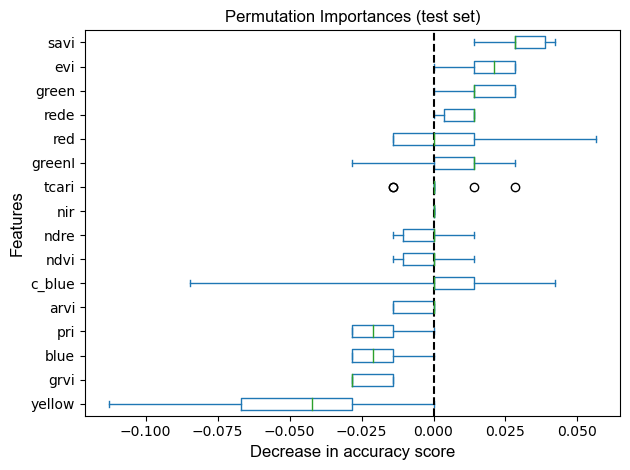

In [26]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_model, X_test_scaled, y_test, n_repeats=10, random_state=16, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)",fontname="Arial")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score",fontname="Arial", fontsize = 12)
ax.set_ylabel("Features",fontname="Arial", fontsize = 12)

ax.figure.tight_layout()